In [1]:
#1. Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
# 2. Read the data file and show the data
df = pd.read_csv('/Users/mac/Documents/HK6/IS403.PTDL KD/đồ án main/code/Data_stock_HVN_VN.csv')
df

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1240,2024-02-23,12650,12750,12500,12550,469600
1241,2024-02-26,12550,12850,12500,12800,627300
1242,2024-02-27,12800,12850,11950,12700,293900
1243,2024-02-28,12900,12900,12650,12650,494700


In [4]:
# 3. Divide the train:test at a ratio of 7:3
df = df[['close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing
train_size = int(0.7 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [5]:
# 4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)  

In [7]:
# 6. The process of creating index predict the next 30, 60, 90 days
last_index = df.index[-1]

# Create arrays of consecutive integers starting from last_index for 30, 60, and 90 days
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 30, 60, 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)


Predicted closing prices for the next 30 days:
[14781.72296095 14770.82469686 14759.92643276 14749.02816867
 14738.12990457 14727.23164048 14716.33337639 14705.43511229
 14694.5368482  14683.6385841  14672.74032001 14661.84205592
 14650.94379182 14640.04552773 14629.14726363 14618.24899954
 14607.35073545 14596.45247135 14585.55420726 14574.65594316
 14563.75767907 14552.85941497 14541.96115088 14531.06288679
 14520.16462269 14509.2663586  14498.3680945  14487.46983041
 14476.57156632 14465.67330222]
Predicted closing prices for the next 60 days:
[14781.72296095 14770.82469686 14759.92643276 14749.02816867
 14738.12990457 14727.23164048 14716.33337639 14705.43511229
 14694.5368482  14683.6385841  14672.74032001 14661.84205592
 14650.94379182 14640.04552773 14629.14726363 14618.24899954
 14607.35073545 14596.45247135 14585.55420726 14574.65594316
 14563.75767907 14552.85941497 14541.96115088 14531.06288679
 14520.16462269 14509.2663586  14498.3680945  14487.46983041
 14476.57156632 1446

In [8]:
# 7. Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import numpy as np

# Calculate RMSE 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_test = mean_absolute_percentage_error(y_test, y_pred)

# Calculate MLSE 
msle_test = mean_squared_log_error(y_test, y_pred)


print("RMSE:", rmse_test)
print("MAPE:", mape_test, "%")
print("MSLE:", msle_test)

RMSE: 4632.155498266319
MAPE: 36.2809142153261 %
MSLE: 0.10561111936189285


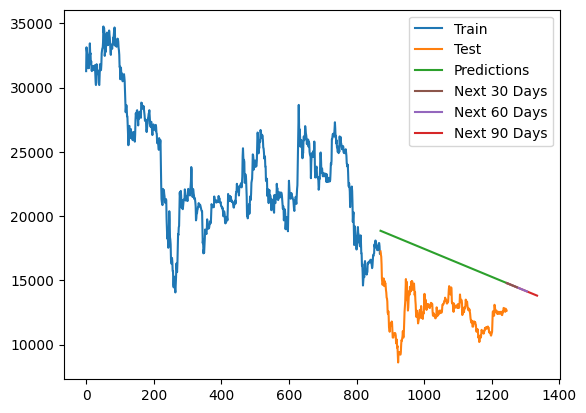

In [9]:
# 8.Plot the results
line1, = plt.plot(train_data.index, train_data['close'], label='Train')
line2, = plt.plot(test_data.index, test_data['close'], label='Test')
line3, = plt.plot(test_data.index, y_pred, label='Predictions')
line4, = plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days')
line5, = plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next 60 Days')
line6, = plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next 30 Days')
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.show()